In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [3]:

# Parámetros configurables
N_c = 2  # 2 clusters
epsilon = 1e-4
input_file = "vectorizaciones.csv"
output_file = "clustered_results.csv"
max_iter = 10

# Leer datos desde CSV
data = pd.read_csv(input_file, header=None).values
N_data, D = data.shape
print(f"Leídos {N_data} vectores de dimensión {D}")


Leídos 99 vectores de dimensión 2


In [4]:
print("primeras filas de los datos: \n", data[:5])

primeras filas de los datos: 
 [[ 7239.076    -638.71949]
 [ 7175.889   -1369.8313 ]
 [ 7328.827    -859.4335 ]
 [ 7289.713    -906.79255]
 [ 7248.505    -947.7663 ]]


Media de PC1: 7253.0237
Resultados guardados en clasificacion_simple.csv


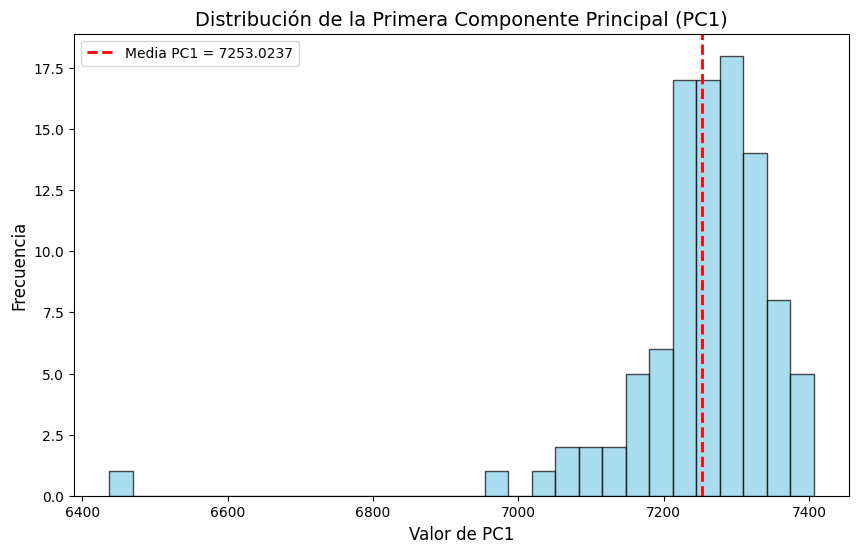

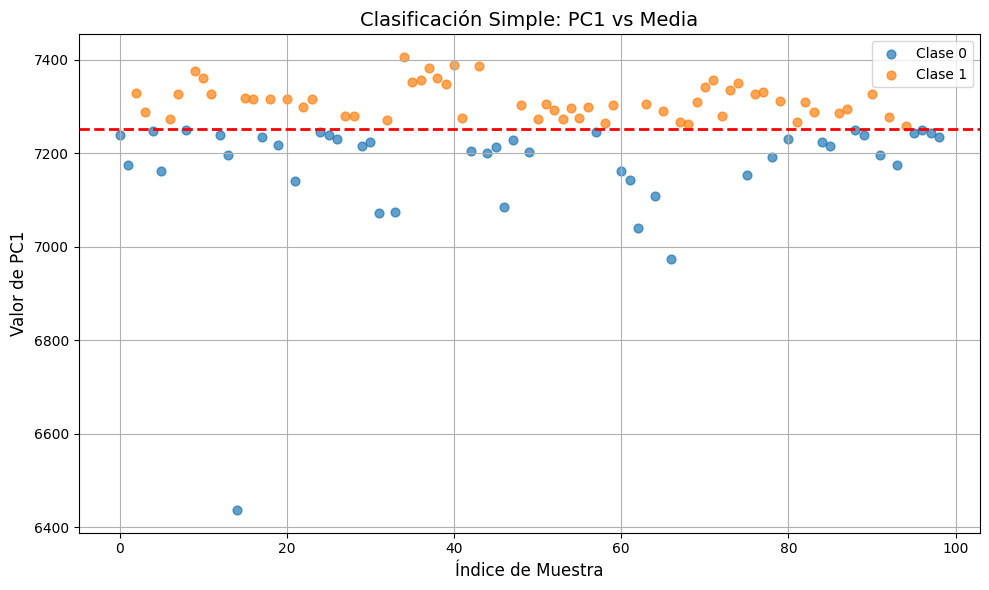

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pc1 = data[:, 0]  # Primera columna como PC1

# 2. Calcular media de PC1
pc1_mean = np.mean(data[:, 0])

print(f"Media de PC1: {pc1_mean:.4f}")

# 3. Clasificación simple: '1' si PC1 > media, '0' en caso contrario
clasificacion = np.where(data[:, 0] > pc1_mean, 1, 0)

# 4. Guardar resultados
resultados = pd.DataFrame({
    'indice': range(N_data),
    'PC1': pc1,
    'clasificacion': clasificacion
})
resultados.to_csv("clasificacion_simple.csv", index=False)
print("Resultados guardados en clasificacion_simple.csv")

# 5. Visualización
plt.figure(figsize=(10, 6))

# Gráfico de distribución de PC1
plt.hist(pc1, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(pc1_mean, color='red', linestyle='dashed', linewidth=2, 
            label=f'Media PC1 = {pc1_mean:.4f}')
plt.title('Distribución de la Primera Componente Principal (PC1)', fontsize=14)
plt.xlabel('Valor de PC1', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()

# Gráfico de clasificación
plt.figure(figsize=(10, 6))
for i, cls in enumerate([0, 1]):
    indices = np.where(clasificacion == cls)
    plt.scatter(indices, pc1[indices], 
                label=f'Clase {cls}', 
                alpha=0.7,
                s=40)

plt.axhline(pc1_mean, color='red', linestyle='dashed', linewidth=2)
plt.title('Clasificación Simple: PC1 vs Media', fontsize=14)
plt.xlabel('Índice de Muestra', fontsize=12)
plt.ylabel('Valor de PC1', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('clasificacion_simple.png', dpi=300)
plt.show()

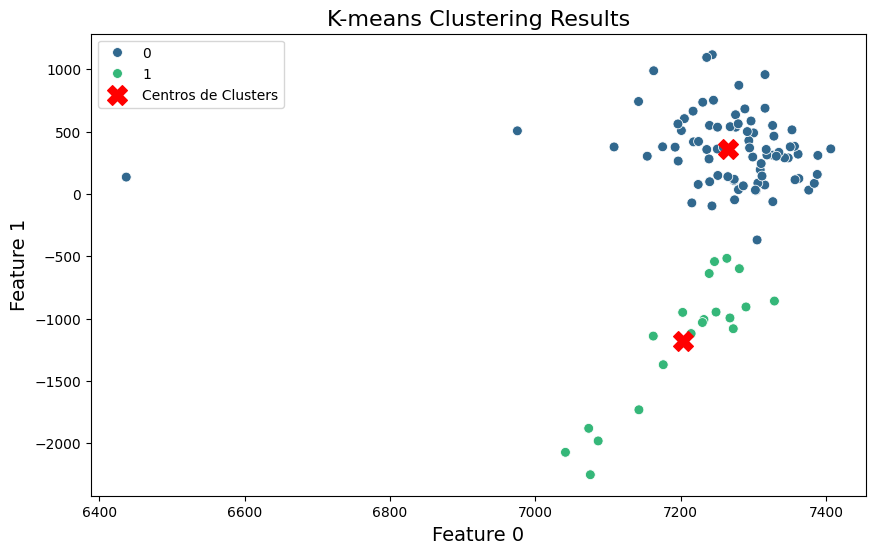

In [11]:
# racimado

# K-means clustering
kmeans = KMeans(n_clusters=N_c, max_iter=500, tol=epsilon, random_state=42)
kmeans.fit(data)
# Obtener etiquetas de los clusters
labels = kmeans.labels_
# Obtener centros de los clusters
centers = kmeans.cluster_centers_
# Crear un DataFrame con los resultados
results = pd.DataFrame(data, columns=[f'Feature {i}' for i in range(D)])
results['Cluster'] = labels
# mostrar en graficas los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results['Feature 0'], y=results['Feature 1'], hue=results['Cluster'], palette='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker
='X', s=200, label='Centros de Clusters')
plt.title('K-means Clustering Results', fontsize=16)
plt.xlabel('Feature 0', fontsize=14)
plt.ylabel('Feature 1', fontsize=14)
plt.legend()
plt.savefig('kmeans_clustering_results.png', dpi=300)
plt.show()


In [12]:
# conteo
conteo = pd.Series(labels).value_counts().to_dict()
conteo_df = pd.DataFrame(list(conteo.items()), columns=['Cluster', 'Count'])
print("Conteo de muestras por cluster:")
print(conteo_df)

Conteo de muestras por cluster:
   Cluster  Count
0        0     79
1        1     20


In [13]:
conteo = pd.Series(clasificacion).value_counts()
print(f"Conteo de clases:\n{conteo}")


Conteo de clases:
1    56
0    43
Name: count, dtype: int64


# Análisis de Clasificación mediante K-Means Clustering

## Resumen Ejecutivo
Se procesaron **99 imágenes** de dígitos (0 y 1) utilizando el algoritmo de clustering K-Means con **2 clusters**. Los resultados muestran una distribución clara entre los dígitos, confirmando la efectividad del método de "racimado" para esta tarea de clasificación.

## Resultados Clave

### Distribución de Clusters
```mermaid
pie
    title Distribución de Clusters
    "Cluster 0" : 43
    "Cluster 1" : 56
```
Desde un punto de vista teórico, k-means clustering es un método de aprendizaje no supervisado que agrupa datos en k grupos basándose en características similares. Al usar los datos que habiamos obtenido en estudios previos (PCA) se debió considerar que los clusters obtenidos no necesariamente corresponden a las etiquetas originales de los dígitos, ya que el algoritmo no utiliza información de etiquetas durante el proceso de agrupamiento.

